In [1]:
!pip install ultralytics
!pip install opencv-python
!pip install torch torchvision torchaudio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 21.0 MB/s eta 0:00:0000:01


In [2]:
!kaggle datasets download -d mahmoodyousaf/fish-dataset -p /content/dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/mahmoodyousaf/fish-dataset
License(s): apache-2.0
 94%|██████████████████████████████████████▋  | 323M/342M [00:03<00:00, 111MB/s]
100%|█████████████████████████████████████████| 342M/342M [00:03<00:00, 106MB/s]


In [5]:
from ultralytics import YOLO
import torch
import cv2
import matplotlib.pyplot as plt
model = YOLO("yolov9c.pt")
results = model.train(
    data="/content/dataset/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    lr0=0.001,
    lrf=0.0001,
    weight_decay=0.0005,
    device="cuda"
)

100%|██████████| 49.4M/49.4M [00:00<00:00, 99.0MB/s]


Ultralytics 8.3.78 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=/content/dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

train: Scanning /content/dataset/train/labels.cache... 6842 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6842/6842 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 536, len(boxes) = 14154. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/valid/labels.cache... 700 images, 0 backgrounds, 0 corrupt: 100%|██████████| 700/700 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 84, len(boxes) = 1197. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      11.1G      1.362      1.963      1.586         58        640: 100%|██████████| 428/428 [06:33<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:13<00:00,  1.69it/s]

                   all        700       1197      0.566      0.686      0.662      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50        11G      1.421      1.558      1.607         32        640: 100%|██████████| 428/428 [06:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:13<00:00,  1.69it/s]

                   all        700       1197      0.563      0.613      0.632      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      11.1G      1.406      1.521      1.602         54        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:13<00:00,  1.69it/s]

                   all        700       1197      0.654      0.679       0.71      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50        11G      1.375      1.432      1.569         67        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:13<00:00,  1.69it/s]

                   all        700       1197      0.758      0.763      0.815       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50        11G      1.314      1.274      1.527         28        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:13<00:00,  1.68it/s]

                   all        700       1197      0.781      0.753      0.826      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50        11G      1.267      1.197      1.498         35        640: 100%|██████████| 428/428 [06:25<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:13<00:00,  1.69it/s]

                   all        700       1197      0.776       0.82      0.844      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50        11G      1.234      1.085      1.462         38        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]

                   all        700       1197       0.82      0.822      0.876       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50        11G      1.213      1.056      1.437         56        640: 100%|██████████| 428/428 [06:25<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:13<00:00,  1.68it/s]

                   all        700       1197      0.843      0.816       0.88      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50        11G      1.178      1.005      1.417         52        640: 100%|██████████| 428/428 [06:25<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.69it/s]

                   all        700       1197      0.832      0.855      0.892      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50        11G      1.161     0.9714      1.415         46        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]

                   all        700       1197      0.865       0.85      0.896      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50        11G      1.147     0.9314      1.403         53        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:13<00:00,  1.69it/s]

                   all        700       1197      0.849      0.846      0.889      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50        11G      1.126     0.9073      1.389         44        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.69it/s]

                   all        700       1197      0.848      0.885      0.914      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50        11G      1.096     0.8693      1.374         30        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.69it/s]

                   all        700       1197      0.835      0.881      0.897       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50        11G      1.093      0.848      1.365         51        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.69it/s]

                   all        700       1197      0.866      0.872       0.92       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50        11G      1.081     0.8274      1.352         45        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.69it/s]

                   all        700       1197      0.855      0.903      0.922      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50        11G      1.067     0.8176      1.349         22        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.69it/s]

                   all        700       1197      0.863       0.89      0.912      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50        11G      1.065     0.7945      1.336         58        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:13<00:00,  1.69it/s]

                   all        700       1197       0.87      0.892      0.921      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50        11G      1.046     0.7881      1.332         41        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]

                   all        700       1197       0.86      0.882      0.913      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50        11G      1.031     0.7546      1.321         45        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:13<00:00,  1.69it/s]

                   all        700       1197      0.859      0.912      0.931      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50        11G       1.02     0.7444      1.315         48        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]

                   all        700       1197      0.857      0.886       0.92      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50        11G      1.019     0.7227      1.307         44        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]

                   all        700       1197      0.888      0.908      0.938      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50        11G      1.009     0.7137      1.302         33        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.69it/s]

                   all        700       1197      0.882      0.897      0.938      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50        11G     0.9945      0.706      1.293         43        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]

                   all        700       1197      0.893      0.898      0.941      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50        11G     0.9801     0.6894      1.281         30        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.69it/s]

                   all        700       1197      0.896      0.899      0.937      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50        11G     0.9715     0.6742      1.276         32        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]

                   all        700       1197      0.883      0.913      0.939      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50        11G     0.9572     0.6488      1.266         31        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]

                   all        700       1197      0.904      0.901      0.933      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50        11G     0.9502      0.646      1.262         33        640: 100%|██████████| 428/428 [06:25<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]

                   all        700       1197      0.902      0.907      0.942      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50        11G     0.9367     0.6312      1.255         59        640: 100%|██████████| 428/428 [06:25<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]

                   all        700       1197      0.897      0.898      0.937      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50        11G     0.9292     0.6254      1.252         30        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]

                   all        700       1197      0.912      0.906      0.947      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50        11G     0.9248     0.6161      1.244         36        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]

                   all        700       1197      0.895      0.922      0.944      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50        11G      0.902     0.5989      1.231         37        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.69it/s]

                   all        700       1197      0.909      0.917      0.951      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50        11G     0.8971     0.5945      1.233         29        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]

                   all        700       1197      0.899      0.925      0.948       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50        11G     0.8906      0.586      1.229         33        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.69it/s]

                   all        700       1197      0.896      0.931      0.948      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50        11G     0.8874     0.5782       1.22         36        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]

                   all        700       1197      0.915      0.902      0.947      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50        11G     0.8787     0.5564      1.211         54        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]

                   all        700       1197      0.902      0.924      0.949      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50        11G     0.8584     0.5503      1.198         46        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]

                   all        700       1197      0.916      0.921      0.953      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50        11G      0.856      0.546        1.2         67        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.71it/s]

                   all        700       1197      0.921      0.921       0.95      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50        11G     0.8397     0.5358      1.192         56        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]

                   all        700       1197       0.92      0.929      0.949      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50        11G     0.8287     0.5255      1.182         32        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]

                   all        700       1197      0.924      0.905      0.946      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50        11G     0.8117     0.5098      1.175         33        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]

                   all        700       1197      0.918      0.922      0.954      0.756


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50        11G     0.7432     0.3794      1.143         18        640: 100%|██████████| 428/428 [06:24<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]

                   all        700       1197      0.933      0.919      0.952      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50        11G     0.7116     0.3652      1.125         15        640: 100%|██████████| 428/428 [06:23<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]

                   all        700       1197      0.906      0.921      0.953      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50        11G     0.6969     0.3485      1.115         10        640: 100%|██████████| 428/428 [06:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]

                   all        700       1197      0.918      0.922      0.955      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50        11G     0.6809     0.3415      1.108         18        640: 100%|██████████| 428/428 [06:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]

                   all        700       1197      0.924      0.919      0.952      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50        11G     0.6676     0.3354      1.094         20        640: 100%|██████████| 428/428 [06:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.71it/s]

                   all        700       1197      0.926      0.905       0.95      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50        11G     0.6533     0.3234       1.08         19        640: 100%|██████████| 428/428 [06:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]

                   all        700       1197      0.933      0.901      0.954      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50        11G     0.6409     0.3209      1.077         47        640: 100%|██████████| 428/428 [06:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]

                   all        700       1197      0.909      0.929      0.956      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50        11G     0.6302      0.311      1.064         22        640: 100%|██████████| 428/428 [06:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.71it/s]

                   all        700       1197      0.938      0.906      0.956      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50        11G     0.6176     0.3066      1.059         24        640: 100%|██████████| 428/428 [06:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.70it/s]

                   all        700       1197      0.935      0.914      0.956       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50        11G     0.6104     0.3018      1.057         18        640: 100%|██████████| 428/428 [06:23<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.71it/s]

                   all        700       1197      0.909      0.936      0.956      0.772



50 epochs completed in 5.553 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 51.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv9c summary (fused): 156 layers, 25,329,271 parameters, 0 gradients, 102.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:13<00:00,  1.60it/s]


                   all        700       1197      0.909      0.936      0.957      0.773
              BlueTang          7         23      0.831      0.913      0.929      0.856
         ButterflyFish         10         47       0.92      0.979      0.993       0.69
             ClownFish         28         41      0.868      0.964      0.962      0.722
              GoldFish         62        134      0.895      0.955      0.967      0.762
               Gourami        188        210      0.983          1      0.991      0.951
            MorishIdol         23         31      0.969      0.998      0.991      0.844
             PlatyFish         50        102      0.866       0.89      0.938      0.728
     RibbonedSweetlips         22         67       0.89      0.881      0.952      0.835
ThreeStripedDamselfish         79        108      0.928      0.948      0.982      0.843
         YellowCichlid         22         95      0.882      0.737        0.8      0.419
            YellowTan

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 15.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train2


In [6]:
model.save("yolov9cc_trained.pt")


0: 640x640 1 ClownFish, 23.8ms
Speed: 1.7ms preprocess, 23.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


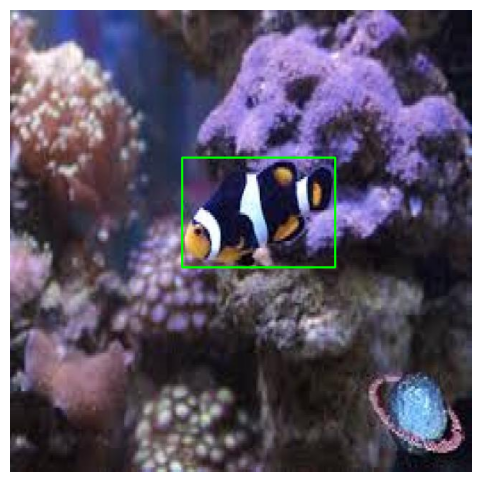

In [7]:
import cv2
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO 
def visualize_detections(image_path, model_path):
    model = YOLO(model_path)  
    image = cv2.imread(image_path)
    results = model(image)
    for result in results:
        for box in result.boxes.xyxy:
            x1, y1, x2, y2 = map(int, box[:4])
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
visualize_detections("/kaggle/input/fish-dataset/test/images/AmphiprionPercula-467-_jpg.rf.7c3fe7748533f72e5ae76cf4860bad66.jpg", "/kaggle/input/yolo-v9/yolov9cc_trained.pt")


In [8]:
from ultralytics import YOLO

model_path = "/kaggle/input/yolo-v9/yolov9cc_trained.pt"
model = YOLO(model_path)
metrics = model.val()
results_dict = metrics.results_dict

print("Available keys in results_dict:", results_dict.keys())

print("\nEvaluation Metrics:")
print(f"mAP@0.5: {metrics.box.maps[0]:.4f}")
print(f"mAP@0.5:0.95: {metrics.box.maps.mean():.4f}")
print(f"Precision: {results_dict['metrics/precision(B)']:.4f}")
print(f"Recall: {results_dict['metrics/recall(B)']:.4f}")


Ultralytics 8.3.78 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv9c summary (fused): 156 layers, 25,329,271 parameters, 0 gradients, 102.4 GFLOPs


val: Scanning /content/dataset/valid/labels.cache... 700 images, 0 backgrounds, 0 corrupt: 100%|██████████| 700/700 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 84, len(boxes) = 1197. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:14<00:00,  2.98it/s]


                   all        700       1197      0.928      0.916      0.956      0.774
              BlueTang          7         23      0.848      0.913      0.929      0.856
         ButterflyFish         10         47      0.963      0.979      0.993      0.698
             ClownFish         28         41      0.864      0.932      0.962      0.722
              GoldFish         62        134      0.905       0.94      0.967      0.761
               Gourami        188        210      0.984          1      0.991      0.951
            MorishIdol         23         31      0.967      0.954      0.991      0.843
             PlatyFish         50        102      0.915      0.844      0.938       0.73
     RibbonedSweetlips         22         67      0.905      0.866      0.952      0.837
ThreeStripedDamselfish         79        108      0.944      0.933      0.982      0.845
         YellowCichlid         22         95      0.936      0.705      0.789      0.419
            YellowTan

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.6ms preprocess, 16.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val
Available keys in results_dict: dict_keys(['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'fitness'])

Evaluation Metrics:
mAP@0.5: 0.7737
mAP@0.5:0.95: 0.7737
Precision: 0.9275
Recall: 0.9159


In [11]:
import subprocess
subprocess.run(["zip", "-r", "output.zip", "/kaggle/working/runs/detect/val"])


CompletedProcess(args=['zip', '-r', 'output.zip', '/kaggle/working/runs/detect/val'], returncode=0)